<a href="https://colab.research.google.com/github/cpschu/eeg-features-and-stims/blob/main/VGG19_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTS
import torchvision.transforms as transforms
import torchvision
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [ ]:
import numpy as np
import scipy.fftpack as sp
import matplotlib
import matplotlib.pyplot as plt
from math import pi
import pickle as pl

'''
This script plots a mock signal and its power spectrum using matplotlib.pyplot.
The mock signal can be modified at line 17.
The sample frequency can be modified at line 12, which will limit which frequencies can be detected.
'''

def create_fft():
    fs = 100 # Allows me to test several frequencies that a 100 Hz sample would detect
    dt = 1/100
    t = [dt * x for x in list(range(0, 200))]
    # t = np.arange(0, 2, 1/(fs)) # Data points collected 100 times per second for 2 seconds

    # Create mock data! I will sum together several sin/cos waves with varying amplitudes and frequencies.
    # I include a function which has a frequency outside of the capabilities of the sampling frequency.
    # UPDATE 5/12: This frequency can't get picked up by the Fourier Transform, so it appears as 20 (120 - fs)
    # Noise adds a weird frequency at 0

    y = [1.5 * np.sin(2*pi*5*t) + 2 * np.cos(2*pi*11*t) + np.sin(2*pi*30*t) + 5 * np.cos(2*pi*120*t)
     + 2 * np.cos(2*pi*6*t) + np.random.random_sample() * 3 for t in t]

    figure = plt.figure()
    ax = figure.subplots(2)
    axes = {'figure1' : ax[0], 'figure2' : ax[1]}

    axes['figure1'].plot(t, y) # Visualize the function pre-fft and frequency identification
    axes['figure1'].set_xlabel("Time (s)")
    axes['figure1'].set_ylabel("Amplitude")

    n = len(t) # We only want to look at the first half of the fft so we need the number of samples
    adj_freq = np.linspace(0, fs / 2, int(n / 2))
    # 5/12 attempted to use sp.fftfreq()

    freqs = sp.fft(y) # Use the fft to get our power spectrum
    adj_y = abs(freqs[0 : int(n / 2)]) / n # Use the first half of the power spectrum y values
    # normalized with 1/n

    axes['figure2'].plot(adj_freq, adj_y)
    axes['figure2'].set_xlabel("Frequency (Hz)")
    axes['figure2'].set_ylabel("Intensity")
    plt.show()

    filename = "fft.pickle"
    outfile = open(filename, "wb")
    pl.dump(figure, outfile)
    outfile.close()
    # pickling doesn't quite work, can't get the figure to show from other file
    # perhaps save the data and construct the plots on the other end

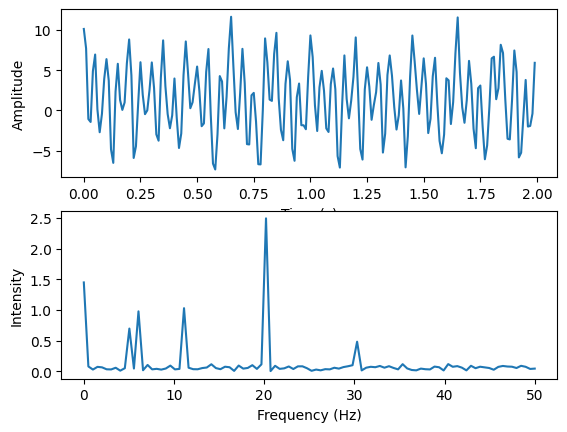

In [ ]:
create_fft()

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import pi
import pickle as pl
import scipy.signal as sig

'''
This script generates a chirp and performs a time-frequency analysis on it.
'''

def analyze_chirp():
    fs = 1024
    dt = 1/fs
    # t = [dt * x for x in list(range(0, 20000))]
    # y = [1.5 * np.sin(2*pi*5*t) + 2 * np.cos(2*pi*11*t) + np.sin(2*pi*30*t)
    #  + 2 * np.cos(2*pi*6*t) + np.random.random_sample() * 3 for t in t]
    t = [dt * x for x in list(range(0, 2 * fs))]
    y = [1.5 * np.sin(2*pi*5*t*t) for t in t]

    figure = plt.figure()
    ax = figure.subplots(3)
    axes = {'figure1' : ax[0], 'figure2' : ax[1], 'figure3' : ax[2]}

    # Plot chirp
    axes['figure1'].plot(t, y)
    axes['figure1'].set_xlabel("Time (s)")
    axes['figure1'].set_ylabel("Amplitude")

    # Plot short-time fourier transform
    f, time, Zxx = sig.stft(y, fs, nperseg=200)
    print(f, time, Zxx)
    axes['figure2'].pcolormesh(time, f, np.abs(Zxx))
    axes['figure2'].set_xlabel("Time (s)")
    axes['figure2'].set_ylabel("Frequency (Hz)")
    axes['figure2'].set_ylim([0, 35])

    # Plot morlet wavelet transform
    freq = np.linspace(1, fs/2, 200)
    widths = fs / (2*freq*np.pi)
    cwtm = sig.cwt(y, sig.morlet2, widths)
    axes['figure3'].pcolormesh(t, freq, np.abs(cwtm))
    axes['figure3'].set_xlabel("Time (s)")
    axes['figure3'].set_ylabel("Frequency (Hz)")
    axes['figure3'].set_ylim([0, 20]) # I had to manually squeeze the window to see the results.
                                      # If I don't limit the y, I get a strange looking area up top
                                      # (Comment out this line of code to see)

    data = {'x': t, 'y' : freq, 'gradient' : np.abs(cwtm)}
    filename = "stft.pickle"
    outfile = open(filename, "wb")
    pl.dump(data, outfile)
    outfile.close()
    plt.show()


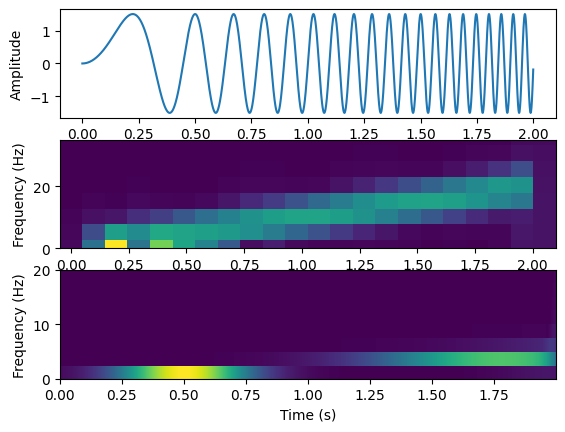

In [ ]:
analyze_chirp()

In [ ]:
class MultiLayerPerceptron(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear1 = nn.Linear(3*32*32, 512)
    self.linear2 = nn.Linear(512, 512)
    self.linear3 = nn.Linear(512, 10)
    self.relu = nn.ReLU()
  def forward(self, x):
    out0 = self.flatten(x)
    out1 = self.linear1(out0)
    out1 = self.relu(out1)
    out3 = self.linear3(out1)
    logits = self.relu(out3)
    return logits
if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"

model = MultiLayerPerceptron().to(device)


In [ ]:
def make_fake_data():
  fs = 1024
  dt = 1/fs
  num_channels = 10
  t = [dt * x for x in range()]



  return fake_data

In [ ]:
preprocess = transforms.Compose([
    transforms.Resize((256)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])